Link to Github repository: https://github.com/fridamariejoergensen/CSS_assignment2.git

### Contribution Statement

We, Frida(s206182), Cecilie(s214605), and Marie(s204052), collaborated on Assignment 2 in Jupyter Notebook.

All members collaborated and contributed to multiple parts of the assignment.

In [69]:
import nltk
nltk.download('stopwords')
import pandas as pd
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import networkx.algorithms.community as nx_community
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
import networkx.algorithms.community as nx_comm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fridajorgensen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Assignment 2

## Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity.

## Part 2: Communities

### Exercise 2: Zachary's karate club:

In [70]:
import netwulf

# 1. Visualizing graph
data_graph = nx.karate_club_graph()
netwulf.interactive.visualize(data_graph)

(None, None)

In [71]:
# coloring each node based in club split
club = nx.get_node_attributes(data_graph, 'club')
nx.set_node_attributes(data_graph, club, 'group')

netwulf.interactive.visualize(data_graph)

(None, None)

In [72]:
# 2. Function for computing modularity of graph partinioning (skal bruge eq. 9.12 fra bogen)



###

<span style="color:red">3. Explain in your own words the concept of modularity<span>

In [73]:
# 4. Compute modularity of the Karate club split partitioning


###

In [74]:
# 5/6. Performe randomization experiment to assess if the modularity is statitically different from 0
rand_graph = data_graph.copy()
print('Number of edges in G before swap: ' + str(len(data_graph.edges)))

# implement the double edge swap algorithm
nx.double_edge_swap(rand_graph, nswap=90, max_tries=500)
print('Number of edges in G before swap: ' + str(len(rand_graph.edges)))


Number of edges in G before swap: 78
Number of edges in G before swap: 78


<span style="color:red"> 7. Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.<span>

In [75]:
# 8. average and standard deviation
av = np.mean(modularities)
std = np.std(modularities)

print('Average of modularities is ' + str(av))
print('Standard deviation of modularities ' + str(std))

Average of modularities is nan
Standard deviation of modularities nan


The actual modularity is 0.39143756676224206


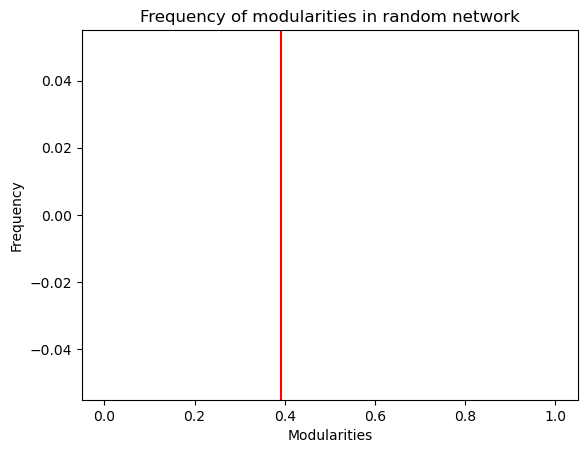

In [79]:
actual_mod = nx_comm.modularity(data_graph, [{x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}, {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}])

print('The actual modularity is ' + str(actual_mod))

plt.hist(modularities)
plt.xlabel('Modularities')
plt.ylabel('Frequency')
plt.title('Frequency of modularities in random network')
plt.axvline(actual_mod, color='red')

10. the club split is not a good partitioning. <span style="color:red"> why not? og kan ikke få distributionen med af en eller anden grund<span>

In [80]:
# 11. Value of modularity using Louvain-algorithm  
communities_z = nx_comm.louvain_communities(data_graph)
modularity_z = nx_comm.modularity(data_graph, communities_z)
print('The modularity of Louvain algorithm is ' + str(modularity_z))

The modularity of Louvain algorithm is 0.44490358126721763


The value found by Louvain is higher than the actual value found for the 'club' split.


<span style="color:red">What does this comparison reveal??<span>

In [ ]:
# 12. Compute confusion matrix

print(communities_z)

club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}
comm_club = [club1, club2]

D = np.zeros((len(communities_z), len(comm_club)))

for i in range(len(comm_club)):
    for n in comm_club[i]:
        for j in range(len(communities_z)):
            if n in communities_z[j]:
                D[j][i] += 1

print(D)

<span style="color:red"> Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.<span>

### Exercise 3: Community detection on the network of Computational Social Scientists.

## Part 3: TF-IDF.

### Exercise 4: TF-IDF and the Computational Social Science communities.

TF-IDF is an approach for representing text that involves the product of two components, term frequency (TF) and inverse document frequency (IDF). The term frequency is determined by dividing the number of occurrences of a specific word in a sentence by the total number of words in that sentence. The inverse document frequency is calculated by taking the logarithm of the total number of sentences in the corpus divided by the number of sentences that contain the specific word. The resulting TF-IDF score is obtained by multiplying the TF and IDF values for each word.

An advantage of TF-IDF over other text representation techniques, such as the bag of words model, is its ability to give an estimation of the semantic meaning of words. While the bag of words model simply represents words as binary values (either present or absent), TF-IDF scores indicate the relative importance of words in different sentences by comparing their scores. For example, if a word is present in every sentence of a corpus, its IDF value would be log(1)=0, resulting in a TF-IDF score of 0 for that word, indicating that it does not convey any special meaning in those sentences.

##### For the next exercise we need:

*  The assignment of each author to their network community, and the degree of each author. 
This is stored in a dataframe:


In [ ]:
G = nx.read_gml('css_network_update.json')

communities = nx_community.louvain_communities(G)

# Dictionary for community assignments and degree of each author
data = {'authorIds': [], 'Community': [], 'Degree': []}

# Loop over each author in the network
for author in G.nodes():
    data['authorIds'].append(author)
    
    for i, community in enumerate(communities):
        if author in community:
            data['Community'].append(i)
            break
    
    data['Degree'].append(G.degree(author))

# Create dataframe
df_community = pd.DataFrame(data)
df_community


,authorIds,Community,Degree
0,1684687,31,10
1,1401290379,22,5
2,1747178,11,4
3,145791827,31,14
4,12619623,31,8
...,...,...,...
427,1719389,90,0
428,1764577,31,1
429,38906978,91,1
430,51440256,91,1


#### And: 
* The tokenized abstract dataframe which is also stored in a pandas dataframe:
<span style="color:red">OBS* Det er kun en lille pickle (skal vi lige ha lavet om)<span style="color:red">

In [ ]:
# Loading abstract pickle
with open('css_abstract', "rb") as f:
        css_abstract = pickle.load(f)

,paperId,title,year,externalId.DOI,citationCount,fields,authorIds,abstract
219,288f55879cc77a1317aba73a51651405c7c69d24,Over-Time Trends in Incivility on Social Media...,2021.0,10.3389/fpos.2021.741605,3,[[Sociology]],"[[47632726, 2496439, 102536922]]",NaN
225,684fbf37238d50c6163cc4676aaa1d13ef94086b,Multiplicity and dynamics of social representa...,2022.0,10.1016/j.ipm.2022.102990,1,[[Sociology]],"[[1720731753, 2117981295, 1720756214, 20076683...",NaN
283,3b6cd901c4d1485237f2437e3f58760e37b2c393,As real as real? Macroeconomic behavior in a l...,2009.0,10.1177/1461444809105346,145,[[Economics]],"[[2022803, 30904401, 39003910, 1768137, 206823...",NaN
303,16a77f15b5eee697979a6e700a3138df2037e942,What Information Drives Political Polarization...,2021.0,10.1177/19401612211004418,4,[[Economics]],"[[2496439, 1735860, 2116330104, 1506167488]]",NaN
423,1c8b8baf806b423f5604259fb9206b9eb18d5dc0,Guilt by association? Network based propagatio...,2013.0,10.1145/2492517.2492649,8,[[Economics]],"[[145919340, 145832870, 143922076, 30904401, 1...",NaN
...,...,...,...,...,...,...,...,...
172394,6f811930f1c1c36b9955f10d7ab95a88d5811e10,NaN,NaN,NaN,NaN,NaN,NaN,None
172421,f35cf07fbad48c007586155508ca436b2b12e686,NaN,NaN,NaN,NaN,NaN,NaN,None
192263,95b16af3dd501525ba799db2d81a8b3874898759,NaN,NaN,NaN,NaN,NaN,NaN,None
197148,8eff870a1941068f591b25cc824184c45e6e7067,NaN,NaN,NaN,NaN,NaN,NaN,We study the ever more integrated and ever mor...


In [ ]:
# Function to tokenize
def tokenize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if not token in stop_words]
    return tokens

In [ ]:
# Load stop words
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token != 'none' and token != 'nan']
    return tokens

# Tokenize and save in new column 'tokens'
css_abstract['abstract'] = css_abstract['abstract'].astype(str)
css_abstract['tokens'] = css_abstract['abstract'].apply(tokenize_text)
css_abstract


,paperId,title,year,externalId.DOI,citationCount,fields,authorIds,abstract,tokens
219,288f55879cc77a1317aba73a51651405c7c69d24,Over-Time Trends in Incivility on Social Media...,2021.0,10.3389/fpos.2021.741605,3,[[Sociology]],"[[47632726, 2496439, 102536922]]",nan,[]
225,684fbf37238d50c6163cc4676aaa1d13ef94086b,Multiplicity and dynamics of social representa...,2022.0,10.1016/j.ipm.2022.102990,1,[[Sociology]],"[[1720731753, 2117981295, 1720756214, 20076683...",nan,[]
283,3b6cd901c4d1485237f2437e3f58760e37b2c393,As real as real? Macroeconomic behavior in a l...,2009.0,10.1177/1461444809105346,145,[[Economics]],"[[2022803, 30904401, 39003910, 1768137, 206823...",nan,[]
303,16a77f15b5eee697979a6e700a3138df2037e942,What Information Drives Political Polarization...,2021.0,10.1177/19401612211004418,4,[[Economics]],"[[2496439, 1735860, 2116330104, 1506167488]]",nan,[]
423,1c8b8baf806b423f5604259fb9206b9eb18d5dc0,Guilt by association? Network based propagatio...,2013.0,10.1145/2492517.2492649,8,[[Economics]],"[[145919340, 145832870, 143922076, 30904401, 1...",nan,[]
...,...,...,...,...,...,...,...,...,...
172394,6f811930f1c1c36b9955f10d7ab95a88d5811e10,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
172421,f35cf07fbad48c007586155508ca436b2b12e686,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
192263,95b16af3dd501525ba799db2d81a8b3874898759,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
197148,8eff870a1941068f591b25cc824184c45e6e7067,NaN,NaN,NaN,NaN,NaN,NaN,We study the ever more integrated and ever mor...,"[study, ever, integrated, ever, unbalanced, tr..."


In [ ]:
bla = css_abstract.explode('authorIds')
blabla = bla.explode('authorIds')


print(css_abstract.shape)
print(bla.shape)
print(blabla.shape)
css_abstract

(1311, 9)
(1311, 9)
(3096, 9)


,paperId,title,year,externalId.DOI,citationCount,fields,authorIds,abstract,tokens
219,288f55879cc77a1317aba73a51651405c7c69d24,Over-Time Trends in Incivility on Social Media...,2021.0,10.3389/fpos.2021.741605,3,[[Sociology]],"[[47632726, 2496439, 102536922]]",nan,[]
225,684fbf37238d50c6163cc4676aaa1d13ef94086b,Multiplicity and dynamics of social representa...,2022.0,10.1016/j.ipm.2022.102990,1,[[Sociology]],"[[1720731753, 2117981295, 1720756214, 20076683...",nan,[]
283,3b6cd901c4d1485237f2437e3f58760e37b2c393,As real as real? Macroeconomic behavior in a l...,2009.0,10.1177/1461444809105346,145,[[Economics]],"[[2022803, 30904401, 39003910, 1768137, 206823...",nan,[]
303,16a77f15b5eee697979a6e700a3138df2037e942,What Information Drives Political Polarization...,2021.0,10.1177/19401612211004418,4,[[Economics]],"[[2496439, 1735860, 2116330104, 1506167488]]",nan,[]
423,1c8b8baf806b423f5604259fb9206b9eb18d5dc0,Guilt by association? Network based propagatio...,2013.0,10.1145/2492517.2492649,8,[[Economics]],"[[145919340, 145832870, 143922076, 30904401, 1...",nan,[]
...,...,...,...,...,...,...,...,...,...
172394,6f811930f1c1c36b9955f10d7ab95a88d5811e10,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
172421,f35cf07fbad48c007586155508ca436b2b12e686,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
192263,95b16af3dd501525ba799db2d81a8b3874898759,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
197148,8eff870a1941068f591b25cc824184c45e6e7067,NaN,NaN,NaN,NaN,NaN,NaN,We study the ever more integrated and ever mor...,"[study, ever, integrated, ever, unbalanced, tr..."


In [ ]:
j = blabla['authorIds'] == 47632726
j

219       False
219       False
219       False
225       False
225       False
          ...  
172394    False
172421    False
192263    False
197148    False
233824    False
Name: authorIds, Length: 3096, dtype: bool

Now, we want to find out which words are important for each community, so we're going to create several *large documents, one for each community*. Each document includes all the tokens of abstracts written by members of a given community.

* Consider a community c
* Find all the abstracts of papers written by a member of community c.
* Create a long array that stores all the abstract tokens
* Repeat for all the communities.

(To ensure your code is efficient, you shall exploit pandas builtin functions, such as groupby.apply or explode)

 Calculate the TF for each word. Use the method of your choice to find the top 5 terms within the top 5 communities (by number of authors).

* Describe similarities and differences between the communities.
* Why aren't the TFs not necessarily a good description of the communities?
* Next, we calculate IDF for every word.
* What base logarithm did you use? Is that important?



   
We're ready to calculate TF-IDF. Do that for the top 9 communities (by number of authors). Then for each community:

* List the 10 top TF words
* List the 10 top TF-IDF words
* List the top 3 authors (by degree)
* Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?



### Exercise 5: The Wordcloud.

Create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like. Make sure that, together with the word cloud, you print the names of the top three authors in each community.

Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?

Look up online the top author in each community. In light of your search, do your results make sense?